In [75]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# make a sawtooth wave
# Define the period T
T = 1./440.
# define the duration of the signal, for plotting
tplot = 4*T
tvec = np.linspace(-tplot,tplot,1000)
h = 1/T # amplitude of the signal - this will producee h*T = 1
def sawtooth(t,h=h):
    t = (t-T) % (2*T) - T
    return h*t
plt.figure()
plt.plot(tvec,sawtooth(tvec))
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [67]:
# compute fourier series expansion for sawtooth wave
def sawtooth_series(t,T,nmin=1,nmax=10):
    # sum over n=1,2,...nmax
    f=np.zeros_like(t)
    for n in range(nmin,nmax+1):
        f = f - 2.0*h*T/n/np.pi*(-1)**n * np.sin(n*np.pi*t/T)
    return f
def sawtooth_spectrum(T,nmin=0,nmax=10):
    n = np.arange(nmin,nmax+1,1)
    c = np.zeros(n.shape)
    for i in range(1,nmax+1):
        c[i] = 2.0*h*T/i/np.pi
    return n,c

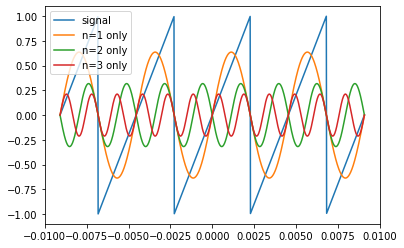

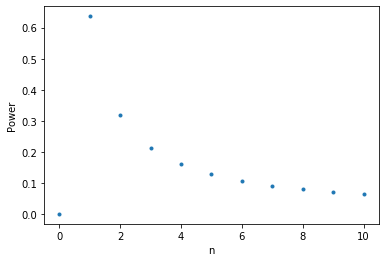

In [68]:
plt.figure()
plt.plot(tvec,sawtooth(tvec),label='signal')
plt.plot(tvec,sawtooth_series(tvec,T,1,1),label='n=1 only')
plt.plot(tvec,sawtooth_series(tvec,T,2,2),label='n=2 only')
plt.plot(tvec,sawtooth_series(tvec,T,3,3),label='n=3 only')
plt.legend()
plt.show()
plt.figure()
n,c = sawtooth_spectrum(T,nmin=0,nmax=10)
plt.plot(n,c,'.')
plt.ylabel('Power')
plt.xlabel('n')
plt.show()


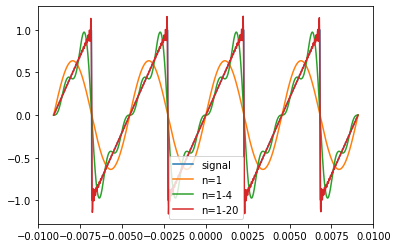

In [62]:
plt.figure()
plt.plot(tvec,sawtooth(tvec),label='signal')
plt.plot(tvec,sawtooth_series(tvec,T,1,1),label='n=1')
plt.plot(tvec,sawtooth_series(tvec,T,1,4),label='n=1-4')
plt.plot(tvec,sawtooth_series(tvec,T,1,50),label='n=1-20')
plt.legend()
plt.show()

In [63]:
# generate a 10-second sample of the sawtooth wave
fs = 44100;
duration = 2.;
t = np.linspace(0,duration,duration*fs+1)
sawtooth_signal = sawtooth(t)

In [83]:
import IPython.display as ipd
ipd.Audio(sawtooth_signal,rate=fs)

In [84]:
# calculate the fundamental frequency only:
sawtooth_fundamental = sawtooth_series(t,T,nmin=1,nmax=1)
ipd.Audio(sawtooth_fundamental,rate=fs)

In [88]:
# calculate up to nmax
nmax=500
t = np.linspace(0,duration,duration*fs+1)
sawtooth_nmax = sawtooth_series(t,T,nmin=1,nmax=nmax)
ipd.Audio(sawtooth_nmax,rate=fs)